1. 1차원 데이터 분석
    1. 변수의 종류 파악 : 수치형, 범주형, 시간형
    2. 변수 종류별 분석 지표
    3. 시각화 : 도수분포표, 히스토그램, 상자그림
2. 2차원 데이터 분석
    1. 공분산/상관계수
    2. 다중공선성 확인
    3. 시각화 : 산점도, 회귀직선, 히트맵

# 항공사 지연요인 데이터 탐색적 분석

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사<br>
carrier_deay : 항공사 지연 요인<br>
atc_delay : ATC 항공교통관제 지연 요인<br>
weather_delay : 날씨로 인한 지연 요인

In [69]:
import pandas as pd

## 1. 변수탐색

수치형/범주형

In [127]:
df = pd.read_csv('data/airline_stats.csv')


범주형 변수 : airline<br>
수치형 변수 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33468 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [72]:
df.select_dtypes(include='number').head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


In [73]:
#범주형 변수의 값 목록
df['airline'].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [74]:
#수치형 변수의 최대/최소/대표값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [75]:
#항공사별 기술 통계
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

## 2. 변수 종류별 분석 지표

In [76]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hancom Gothic'
rcParams['axes.unicode_minus'] = False

In [ ]:
# 결측치 처리의 경우 항공사별 중앙값으로 지정했는데 평균으로 지정하기에는 최소값과 최대값의 격차가 너무 크기 때문
df_group_filled = df.copy()
for col in ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']:
    df_group_filled[col] = df_group_filled.groupby('airline')[col]\
                                          .transform(lambda x: x.fillna(x.median()))

In [120]:
df[df['airline'] == 'American']['pct_carrier_delay'].median()

np.float64(8.42857142857143)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7464\426218581.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes.boxplot(x=


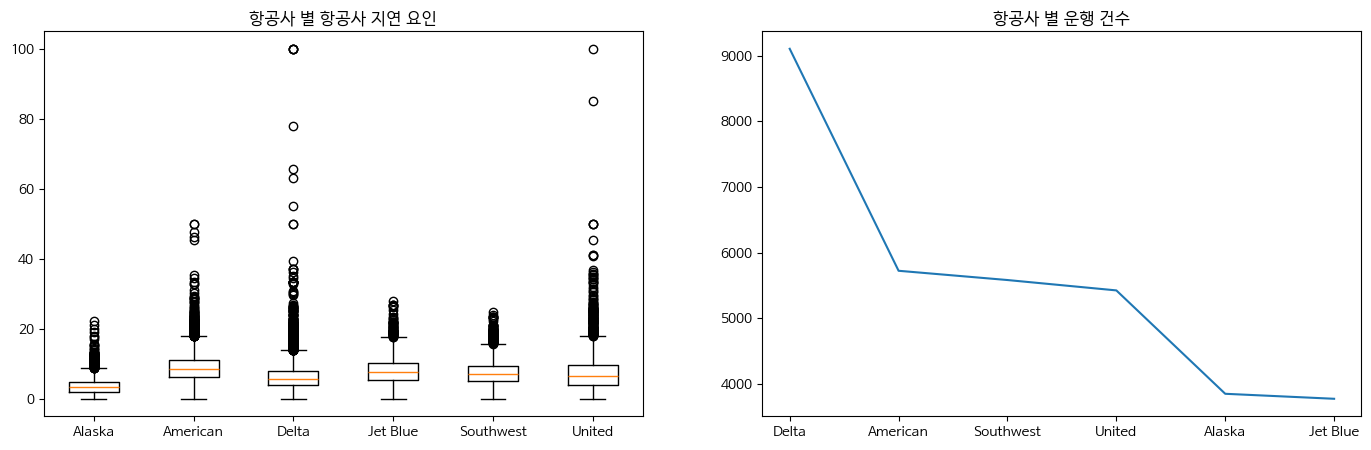

In [146]:
fig = plt.figure(figsize=[17,5])
axes = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes.boxplot(x=
             [df_group_filled[df_group_filled['airline'] == 'Alaska']['pct_carrier_delay'],
             df_group_filled[df_group_filled['airline'] == 'American']['pct_carrier_delay'],
             df_group_filled[df_group_filled['airline'] == 'Delta']['pct_carrier_delay'],
             df_group_filled[df_group_filled['airline'] == 'Jet Blue']['pct_carrier_delay'],
             df_group_filled[df_group_filled['airline'] == 'Southwest']['pct_carrier_delay'],
             df_group_filled[df_group_filled['airline'] == 'United']['pct_carrier_delay']],
             labels=['Alaska', 'American', 'Delta', 'Jet Blue', 'Southwest', 'United'])
axes2.plot(df_group_filled['airline'].value_counts())
axes.set_title("항공사 별 항공사 지연 요인")
axes2.set_title("항공사 별 운행 건수")
plt.show()

- 왼쪽이 항공사 별 항공사 지연 요인을 비교한 박스 플롯, 오른쪽이 항공사 별 운행 건수를 비교한 그래프이다.
- 전체적으로 운행 건수가 적을수록 항공사 지연 요인의 이상치가 적고 안정적인것을 알 수 있다.
- 이 중 United가 운행 건수에 비해 이상치가 높고 많은데 이는 United항공사가 불안정하다는것을 나타내는 지표로 보인다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7464\1881730157.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes.boxplot(x=


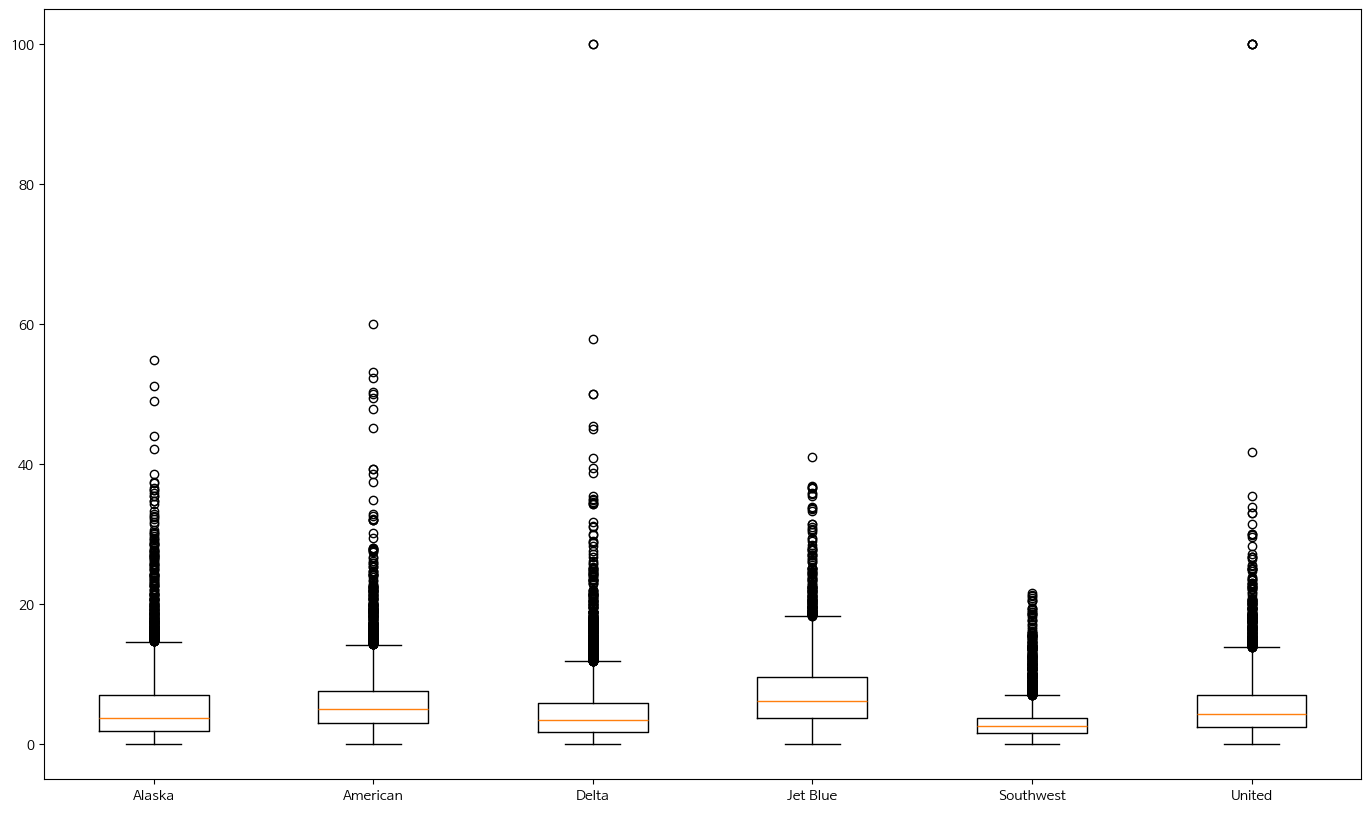

In [165]:
fig = plt.figure(figsize=[17,10])
axes = fig.add_subplot(1,1,1)
axes.boxplot(x=
             [df_group_filled[df_group_filled['airline'] == 'Alaska']['pct_atc_delay'],
             df_group_filled[df_group_filled['airline'] == 'American']['pct_atc_delay'],
             df_group_filled[df_group_filled['airline'] == 'Delta']['pct_atc_delay'],
             df_group_filled[df_group_filled['airline'] == 'Jet Blue']['pct_atc_delay'],
             df_group_filled[df_group_filled['airline'] == 'Southwest']['pct_atc_delay'],
             df_group_filled[df_group_filled['airline'] == 'United']['pct_atc_delay']],
             labels=['Alaska', 'American', 'Delta', 'Jet Blue', 'Southwest', 'United'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7464\4123270438.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmax' will be ignored
  axes.scatter(


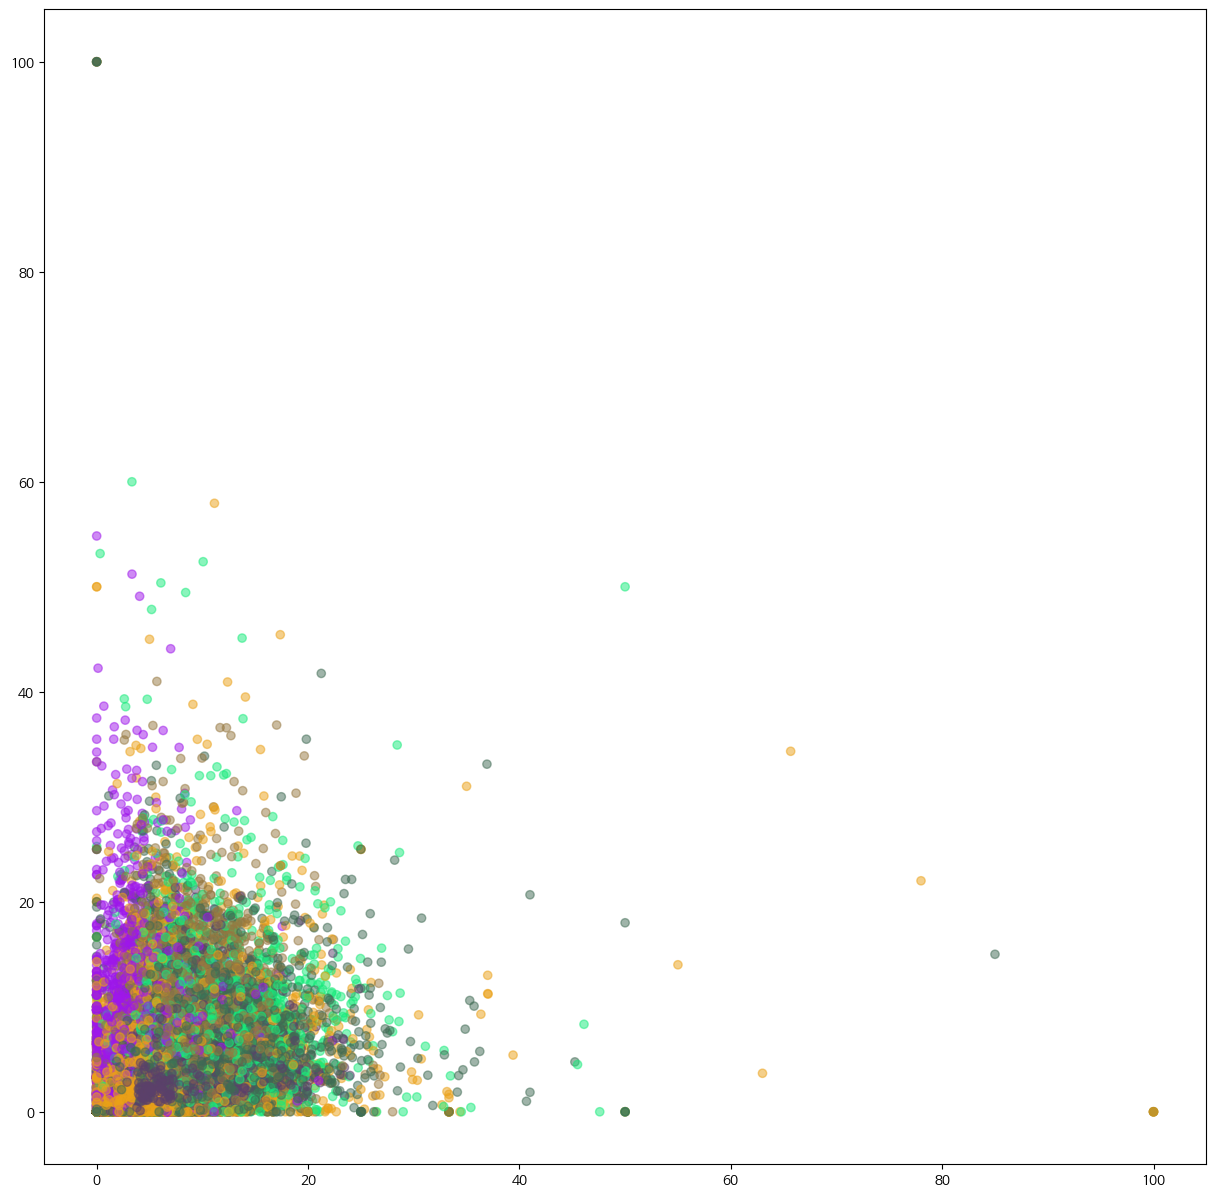

In [ ]:
colors = {"Alaska":"#9E17EB","American":"#17EB7B", 'Delta':'#EBA117','Jet Blue':'#967841','Southwest':'#5B406B','United':'#406B54'}

fig = plt.figure(figsize=[15,15])
axes = fig.add_subplot(1,1,1)
axes.scatter(
    data=df_group_filled,
    x='pct_carrier_delay',
    y='pct_atc_delay',
    alpha=0.5,
    c=df_group_filled['airline'].map(colors)
)
plt.show()

In [158]:
df_group_filled.corr(numeric_only=True)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144515,0.161519
pct_atc_delay,0.144515,1.000000,0.091778
pct_weather_delay,0.161519,0.091778,1.000000
